**Tugas Lab KLASIFIKASI 2**

1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

Gunakan model dengan kernel linier.
Gunakan model dengan kernel polynomial.
Gunakan model dengan kernel RBF.
Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

#**TUGAS LAB - Support Vector Machine (SVM)**

**Import library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**Upload file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving voice.csv to voice.csv


**Load dataset**

In [ ]:
df = pd.read_csv('voice.csv')
print("Jumlah data:", df.shape)
df.head()

Jumlah data: (3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Encode label**

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # male=1, female=0

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
splits = [(0.7, 0.3), (0.8, 0.2)]
kernels = ['linear', 'poly', 'rbf']


=== HASIL PERFORMA MODEL SVM (voice.csv) ===
   Split  Kernel  Akurasi
0  70:30  linear   0.9706
1  70:30    poly   0.9569
2  70:30     rbf   0.9811
3  80:20  linear   0.9763
4  80:20    poly   0.9685
5  80:20     rbf   0.9826


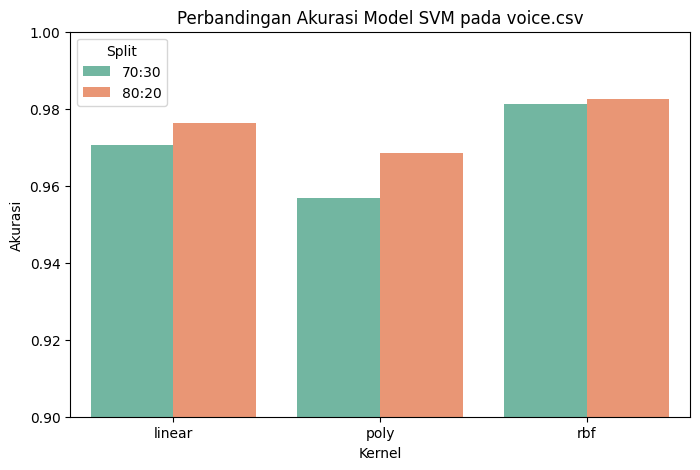

In [ ]:
results = []

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    for kernel in kernels:
        model = SVC(kernel=kernel)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'Split': f"{int(train_size*100)}:{int(test_size*100)}",
            'Kernel': kernel,
            'Akurasi': round(acc, 4)
        })

# Tampilkan hasil
df_results = pd.DataFrame(results)
print("\n=== HASIL PERFORMA MODEL SVM (voice.csv) ===")
print(df_results)

# Visualisasi hasil
plt.figure(figsize=(8,5))
sns.barplot(data=df_results, x='Kernel', y='Akurasi', hue='Split', palette='Set2')
plt.title('Perbandingan Akurasi Model SVM pada voice.csv')
plt.ylim(0.9, 1.0)
plt.show()

#**Klasifikasi Citra Siang dan Malam**

**import library**

In [ ]:
import cv2
import os
from sklearn.model_selection import train_test_split

In [ ]:
from zipfile import ZipFile
uploaded = files.upload()

with ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

Saving images.zip to images.zip


In [ ]:
def load_dataset(img_dir):
    img_list = []
    for label_name in os.listdir(img_dir):
        label_path = os.path.join(img_dir, label_name)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                if file.endswith('.jpg'):
                    img = cv2.imread(os.path.join(label_path, file))
                    if img is not None:
                        img_list.append((img, label_name))
    return img_list

def standarized_input(image):
    return cv2.resize(image, (256, 256))

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    processed = []
    for img, label in img_list:
        std_img = standarized_input(img)
        lbl = label_encoder(label)
        processed.append((std_img, lbl))
    return processed

**Fitur histogram warna (8x8x8 bins)**

In [ ]:
def extract_histogram(image):
    hist = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0,256,0,256,0,256])
    return cv2.normalize(hist, hist).flatten()

**Load data training dan testing**

In [ ]:
train_dir = "images/training"
test_dir = "images/test"

train_img = preprocess(load_dataset(train_dir))
test_img = preprocess(load_dataset(test_dir))

**Ekstraksi fitur ke bentuk numerik**

In [ ]:
X_train = np.array([extract_histogram(img[0]) for img in train_img])
y_train = np.array([img[1] for img in train_img])
X_test = np.array([extract_histogram(img[0]) for img in test_img])
y_test = np.array([img[1] for img in test_img])

**Hyperparameter tuning kernel RBF**

In [ ]:
params = [
    {'C': 1, 'gamma': 0.01},
    {'C': 10, 'gamma': 0.01},
    {'C': 1, 'gamma': 0.1},
    {'C': 10, 'gamma': 0.1},
    {'C': 100, 'gamma': 0.01},
]

best_acc = 0
best_param = None

for p in params:
    model = SVC(kernel='rbf', C=p['C'], gamma=p['gamma'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"C={p['C']} | gamma={p['gamma']} -> Akurasi : {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_param = p

print("\n=== HASIL TERBAIK KLASIFIKASI SIANG/MALAM ===")
print(f"Kernel RBF | Akurasi: {best_acc:.4f} | Parameter terbaik : {best_param}")

C=1 | gamma=0.01 -> Akurasi : 0.8313
C=10 | gamma=0.01 -> Akurasi : 0.9375
C=1 | gamma=0.1 -> Akurasi : 0.9437
C=10 | gamma=0.1 -> Akurasi : 0.9563
C=100 | gamma=0.01 -> Akurasi : 0.9563

=== HASIL TERBAIK KLASIFIKASI SIANG/MALAM ===
Kernel RBF | Akurasi: 0.9563 | Parameter terbaik : {'C': 10, 'gamma': 0.1}


In [10]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from collections import Counter

# LOAD DATASET
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []

    # Ambil semua subfolder (day, night)
    for subdir in p.glob('*'):
        if subdir.is_dir():
            label = subdir.name.lower().strip()  # nama folder = label
            for file in subdir.glob('*.jpg'):
                img = mpimg.imread(file)
                if img is not None:
                    img_list.append((img, label))
    return img_list


# Lokasi folder training (ubah sesuai lokasi kamu)
data_dir = "/content/drive/MyDrive/Colab Notebooks/Pembelarajan Mesin/Minggu 11/images/images/training"

# Muat dataset
img_list = load_dataset(data_dir)
print(f"Total gambar: {len(img_list)}")
print("Distribusi label:", Counter([label for _, label in img_list]))

if len(img_list) == 0:
    raise ValueError("⚠️ Tidak ada gambar ditemukan! Pastikan path dan ekstensi .jpg benar.")

# PREPROCESSING
# - Resize dan encode label

def standarized_input(image):
    std_img = cv2.resize(image, (256, 256))
    return std_img

def label_encoder(label):
    return 1 if label == "day" else 0

def preprocess(img_list):
    std_img_list = []
    for img, label in img_list:
        image = standarized_input(img)
        label_enc = label_encoder(label)
        std_img_list.append((image, label_enc))
    return std_img_list

data_preprocessed = preprocess(img_list)
print(f"Contoh shape gambar: {data_preprocessed[0][0].shape}")

# EKSTRAKSI FITUR HISTOGRAM


def extract_histogram(image):
    # 8x8x8 bins dari 3 channel warna
    hist = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0,256,0,256,0,256])
    return cv2.normalize(hist, hist).flatten()

# Buat dataset fitur dan label
X = np.array([extract_histogram(img[0]) for img in data_preprocessed])
y = np.array([img[1] for img in data_preprocessed])

print(f"Shape fitur: {X.shape}, Label: {y.shape}")

# SPLIT DATA 80:20

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train: {len(X_train)}, Test: {len(X_test)}")

# MODEL SVM (RBF) + HYPERPARAMETER TUNING

params = [
    {'C': 1, 'gamma': 0.01},
    {'C': 10, 'gamma': 0.01},
    {'C': 1, 'gamma': 0.1},
    {'C': 10, 'gamma': 0.1},
    {'C': 100, 'gamma': 0.01},
    {'C': 100, 'gamma': 0.1}
]

best_acc = 0
best_param = None

print("\n=== HASIL EKSPLORASI PARAMETER ===")
for p in params:
    model = SVC(kernel='rbf', C=p['C'], gamma=p['gamma'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"C={p['C']} | gamma={p['gamma']} -> Akurasi: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_param = p

print("\n=== HASIL TERBAIK ===")
print(f"Kernel RBF | Akurasi: {best_acc:.4f}")
print(f"Parameter terbaik: {best_param}")


Total gambar: 240
Distribusi label: Counter({'night': 120, 'day': 120})
Contoh shape gambar: (256, 256, 3)
Shape fitur: (240, 512), Label: (240,)
Train: 192, Test: 48

=== HASIL EKSPLORASI PARAMETER ===
C=1 | gamma=0.01 -> Akurasi: 0.9167
C=10 | gamma=0.01 -> Akurasi: 0.9375
C=1 | gamma=0.1 -> Akurasi: 0.9375
C=10 | gamma=0.1 -> Akurasi: 1.0000
C=100 | gamma=0.01 -> Akurasi: 1.0000
C=100 | gamma=0.1 -> Akurasi: 1.0000

=== HASIL TERBAIK ===
Kernel RBF | Akurasi: 1.0000
Parameter terbaik: {'C': 10, 'gamma': 0.1}
